In [ ]:
% when running localy
path_to_spm = '/home/remi/matlab/SPM/spm12/';
addpath(path_to_spm)

In [ ]:
addpath(fullfile(pwd, 'octave'))

In [ ]:
data_folder = fullfile(pwd, '..', 'inputs', 'ds003542');
subject = '01';

In [ ]:
BIDS = spm_BIDS(data_folder);

t1w_path = spm_BIDS(BIDS, 'data', ...
                    'sub', subject, ...
                    'type', 'T1w')
bold_path = spm_BIDS(BIDS, 'data', 
                    'sub', subject, 
                    'task', 'compL1', 
                    'run', '1', 
                    'type', 'bold')

In [ ]:
% let's ouput the data into a different derivative folder to keep the original data clean
output_dir = fullfile(data_folder, 'derivatives','spm12')
spm_mkdir(output_dir, ['sub-' subject], {'anat', 'func'});

matlabbatch = set_batch_gunzip(t1w_path, fullfile(output_dir, ['sub-' subject], 'anat'));
spm_jobman('run', matlabbatch);

matlabbatch = set_batch_gunzip(bold_path, fullfile(output_dir, ['sub-' subject], 'func'));
spm_jobman('run', matlabbatch);

In [ ]:
t1w_path = spm_select('FPlistrec', output_dir, '.*_T1w.nii')
bold_path = spm_select('FPlistrec', output_dir, '.*_bold.nii')

In [29]:
t1w_file = spm_vol(t1w_path);
t1w_image = spm_read_vols(t1w_file);

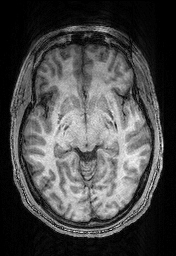

In [30]:
t1w_slice = t1w_image(:, :, 150);
imagesc(rot90(t1w_slice))
axis image
colormap gray

In [ ]:
bold_file = spm_vol(bold_path);
bold_image = spm_read_vols(bold_file);

In [ ]:
bold_slice = bold_image(:, :, 10, 1);
imagesc(rot90(bold_slice))
axis image
colormap gray

In [ ]:
voxel_BOLD_vector = bold_image(31, 54, 21, :);
plot(squeeze(voxel_BOLD_vector))